<a href="https://colab.research.google.com/github/kunall07/DL-ASSIGNMENT/blob/main/DL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix

In [ ]:
def load_svhn():
    dataset = tfds.load('svhn_cropped', split=['train', 'test'], batch_size=-1, as_supervised=True)
    (x_train, y_train), (x_test, y_test) = tfds.as_numpy(dataset)
    x_train, x_test = x_train / 255.0, x_test / 255.0
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
    return x_train, y_train, x_val, y_val, x_test, y_test

In [ ]:
def plot_samples(x_train, y_train):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        idx = np.where(y_train == i)[0][0]
        ax.imshow(x_train[idx], cmap='gray')
        ax.set_title(f"Label: {i}")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

In [ ]:
def build_model(hidden_layers, activation, weight_decay, learning_rate, optimizer):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
    for units in hidden_layers:
        model.add(tf.keras.layers.Dense(units, activation=activation, kernel_regularizer=l2(weight_decay)))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    optimizer_dict = {
        'sgd': tf.keras.optimizers.SGD(learning_rate=learning_rate),
        'momentum': tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9),
        'nesterov': tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True),
        'rmsprop': tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
        'adam': tf.keras.optimizers.Adam(learning_rate=learning_rate),
        'nadam': tf.keras.optimizers.Nadam(learning_rate=learning_rate)
    }
    model.compile(optimizer=optimizer_dict[optimizer], loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/73257 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.UPA7A8_3.1.0/svhn_cropped-train.tfrecord*...:   0%…

Generating test examples...:   0%|          | 0/26032 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.UPA7A8_3.1.0/svhn_cropped-test.tfrecord*...:   0%|…

Generating extra examples...:   0%|          | 0/531131 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.UPA7A8_3.1.0/svhn_cropped-extra.tfrecord*...:   0%…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.1.0. Subsequent calls will reuse this data.


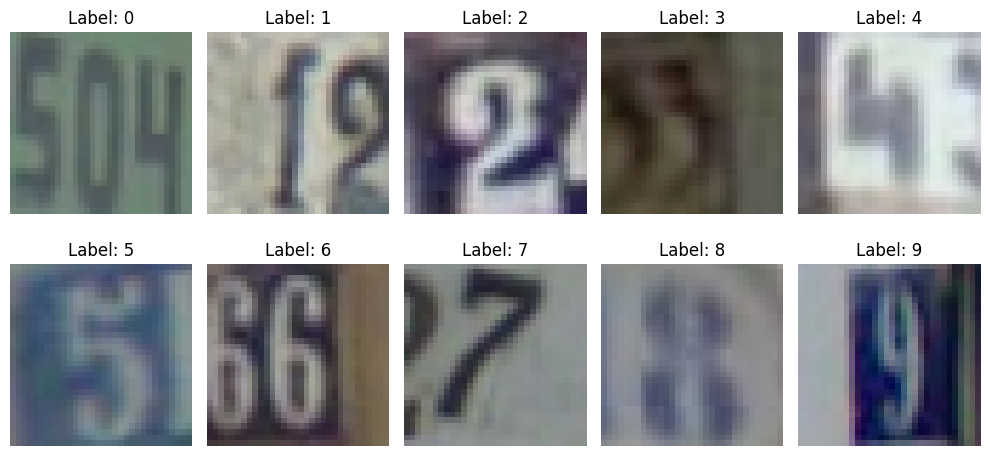


Training Model 1 with: (5, [32, 32, 32], 0.0005, 0.001, 'adam', 32, 'relu')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.1854 - loss: 2.2806 - val_accuracy: 0.1937 - val_loss: 2.2089
Epoch 2/5
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.1904 - loss: 2.1988 - val_accuracy: 0.1948 - val_loss: 2.1645
Epoch 3/5
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1972 - loss: 2.1709 - val_accuracy: 0.1929 - val_loss: 2.1658
Epoch 4/5
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.1999 - loss: 2.1680 - val_accuracy: 0.1942 - val_loss: 2.1596
Epoch 5/5
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1977 - loss: 2.1703 - val_accuracy: 0.1949 - val_loss: 2.1595

Training Model 2 with: (10, [64, 64, 64, 64], 0, 0.0001, 'sgd', 16, 'sigmoid')
Epoch 1/10
4121/4121 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.1095 - loss: 2.3714 - val_accuracy: 0.1937 - val_loss: 2.2666
Epoch 2/10
4121/4121 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.1875 - loss: 2.2596 - val_accuracy: 0.1937 - val_loss: 2.2386
Epoch 3/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.1931 - loss: 2.2634
Epoch 2/5
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2596 - loss: 2.0614
Epoch 3/5
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.2579 - loss: 2.0463
Epoch 4/5
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2587 - loss: 2.0469
Epoch 5/5
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2607 - loss: 2.0386
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2656 - loss: 2.0760

Final Test Accuracy: 0.2615
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


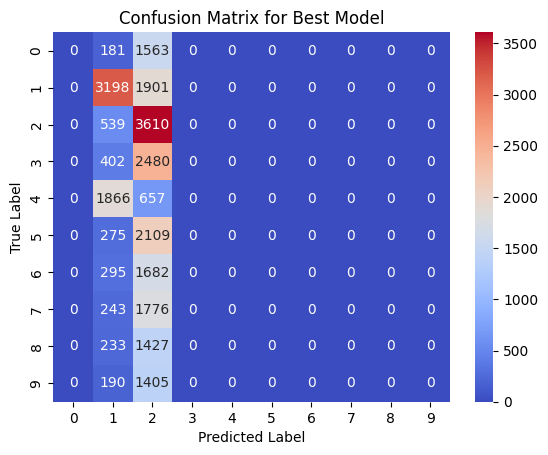

In [ ]:
def run_experiments():
    x_train, y_train, x_val, y_val, x_test, y_test = load_svhn()
    plot_samples(x_train, y_train)

    hyperparameter_combinations = [
        (5, [32, 32, 32], 0.0005, 1e-3, 'adam', 32, 'relu'),
        (10, [64, 64, 64, 64], 0, 1e-4, 'sgd', 16, 'sigmoid'),
        (5, [128, 128, 128, 128, 128], 0.5, 1e-3, 'rmsprop', 64, 'relu')
    ]

    results = []
    for i, params in enumerate(hyperparameter_combinations):
        num_epochs, hidden_layers, weight_decay, learning_rate, optimizer, batch_size, activation = params
        print(f"\nTraining Model {i+1} with: {params}")
        model = build_model(hidden_layers, activation, weight_decay, learning_rate, optimizer)
        history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size, verbose=1)
        val_acc = max(history.history['val_accuracy'])
        results.append({
            'Epochs': num_epochs, 'Layers': hidden_layers, 'Weight Decay': weight_decay,
            'Learning Rate': learning_rate, 'Optimizer': optimizer, 'Batch Size': batch_size,
            'Activation': activation, 'Validation Accuracy': val_acc
        })

    df_results = pd.DataFrame(results)
    print("\nTraining Summary:")
    print(df_results)

    best_model_config = df_results.loc[df_results['Validation Accuracy'].idxmax()].to_dict()
    print(f"\nBest Model Configuration: {best_model_config}")

    best_model = build_model(best_model_config['Layers'], best_model_config['Activation'],
                             best_model_config['Weight Decay'], best_model_config['Learning Rate'],
                             best_model_config['Optimizer'])
    best_model.fit(x_train, y_train, epochs=best_model_config['Epochs'], batch_size=best_model_config['Batch Size'], verbose=1)
    test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=1)
    print(f"\nFinal Test Accuracy: {test_acc:.4f}")

    y_pred = np.argmax(best_model.predict(x_test), axis=1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for Best Model')
    plt.show()

if __name__ == "__main__":
    run_experiments()
